# Introducción al Machine Learning con Scikit-Learn

Esta sesión cubrirá los conceptos básicos de Scikit-Learn, un paquete popular que contiene una colección de herramientas para el aprendizaje automático escritas en Python. Pueden ver más en http://scikit-learn.org.

## Contenido

**Objetivo principal:** Presentar los conceptos centrales del aprendizaje automático y cómo se pueden aplicar en Python mediante el paquete Scikit-learn.

- Definición de aprendizaje automático
- Representación de datos en scikit-learn
- Introducción a la API de Scikit-learn
- Aprendizaje supervisado: clasificación y regresión
- Pipelines de scikit-learn

## Acerca de Scikit-Learn

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) es un paquete de Python diseñado para brindar acceso a **conocidos** algoritmos de aprendizaje automático dentro del código Python, a través de una **limpia y bien pensada API**. Ha sido creado por cientos de colaboradores de todo el mundo y se utiliza en la industria y el mundo académico.

Scikit-Learn se basa en las bibliotecas de Python [NumPy (Numerical Python)](http://numpy.org) y [SciPy (Scientific Python)](http://scipy.org), que permiten hacer cálculos eficientes y computación científica dentro de Python. Como tal, scikit-learn no está diseñado específicamente para conjuntos de datos extremadamente grandes, aunque hay [algo de trabajo](https://github.com/ogrisel/parallel_ml_tutorial) en esta área.

Para esta breve introducción, nos centraremos en las cuestiones del procesamiento interno de conjuntos de datos pequeños y medianos con Scikit-learn.

## ¿Qué es el aprendizaje automático?

El aprendizaje automático se trata de crear programas con **parámetros ajustables** (normalmente un
matriz de valores de punto flotante) que se ajustan automáticamente para mejorar
su comportamiento **adaptándose a los datos vistos anteriormente**.

El aprendizaje automático se considera un subcampo de **Inteligencia artificial** ya que
Los algoritmos pueden verse como bloques de construcción para hacer que las computadoras aprendan a comportarse más
inteligentemente al **generalizar** de alguna manera en lugar de simplemente almacenar y recuperar elementos de datos
como haría un sistema de base de datos.

Aquí echaremos un vistazo a dos tareas de aprendizaje automático muy simples.

La primera es una tarea de **clasificación**: la figura muestra una
recopilación de datos bidimensionales, coloreados según dos clases diferentes
etiquetas. Se puede utilizar un algoritmo de clasificación para trazar un límite divisorio
entre los dos grupos de puntos:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')

C:\Users\Alumno\anaconda3\envs\fastai\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


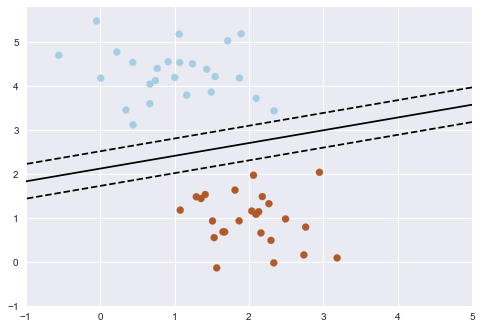

In [2]:
from sgd_separator import plot_sgd_separator
plot_sgd_separator()

Esto puede parecer una tarea trivial, pero es una versión simple de un concepto muy importante.
Al dibujar esta línea de separación, hemos aprendido un modelo que puede **generalizar** a nuevos datos: si tuvieran que colocar otro punto en el plano que no está etiquetado, este algoritmo ahora podría **predecir** si es un punto azul o rojo.

La siguiente tarea simple que veremos es una tarea de **regresión**: una línea simple de mejor ajuste a un conjunto de datos:

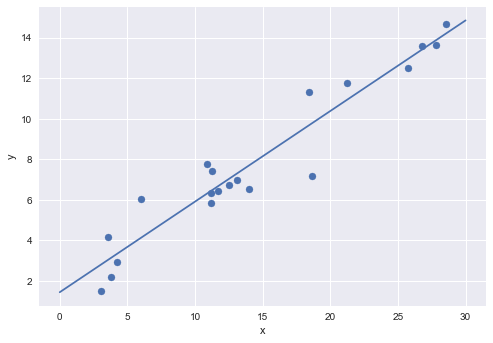

In [3]:
from linear_regression import plot_linear_regression
plot_linear_regression()

Nuevamente, este es un ejemplo de cómo ajustar un modelo a los datos, de modo que el modelo pueda hacer
generalizaciones sobre nuevos datos. El modelo ha **aprendido** de la forma
de los datos y se puede utilizar para predecir el resultado de los datos de prueba:
aquí, podríamos darnos un valor x, y el modelo sería
nos permite predecir el valor de y. De nuevo, esto puede parecer un problema trivial,
pero es un ejemplo básico de un tipo de operación que es fundamental para
tareas de aprendizaje automático.

## Representación de datos en Scikit-learn

El aprendizaje automático se trata de crear modelos a partir de datos: por esa razón, comenzaremos por
discutir cómo se pueden representar los datos para que la computadora los entienda. A lo largo
con esto, construiremos sobre nuestros ejemplos de matplotlib de la sección anterior y mostraremos algunos
ejemplos de cómo visualizar datos.

La mayoría de los algoritmos de aprendizaje automático implementados en scikit-learn esperan que los datos se almacenen en una
**matriz o matriz bidimensional**. Las matrices pueden ser
ya sea matrices `numpy` o, en algunos casos, matrices `scipy.sparse`
Se espera que el tamaño de la matriz sea `[n_samples, n_features]`

- **n_samples:** El número de muestras: cada muestra es un elemento para procesar (por ejemplo, clasificar).
  Una muestra puede ser un documento, una imagen, un sonido, un video, un objeto astronómico,
  una fila en la base de datos o archivo CSV,
  o lo que pueda describir con un conjunto fijo de rasgos cuantitativos.
- **n_features:** La cantidad de características o rasgos distintos que se pueden usar para describir cada uno de las características de manera cuantitativa. Las características generalmente tienen un valor real, pero pueden ser booleanas o
  valorado de forma discreta en algunos casos.

El número de características debe fijarse de antemano. Sin embargo, pueden existir muhas dimensiones (por ejemplo, millones de características) y la mayoría de ellos pueden ser ceros para una muestra determinada. Este es un caso
donde las matrices `scipy.sparse` pueden ser útiles, ya que son
mucho más eficiente en memoria que las matrices numpy.

![Data Layout](data-layout.png)

### Carga de los datos de Iris con Scikit-Learn

Scikit-learn tiene un conjunto de datos muy sencillo sobre estas especies de iris. Los datos consisten en
el seguimiento:

- Características en el conjunto de datos Iris:

   1. longitud del sépalo en cm
   2. ancho del sépalo en cm
   3. longitud del pétalo en cm
   4. ancho del pétalo en cm

- Clases de destino para predecir:

   1. Iris Setosa
   2. Iris Versicolour
   3. Iris Virginica
  
``scikit-learn`` incrusta una copia del archivo CSV de iris junto con una función auxiliar para cargarlo en matrices numpy:

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [13]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
type(iris)

sklearn.utils.Bunch

In [37]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [38]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [39]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [73]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Estos datos son de cuatro dimensiones, pero podemos visualizar dos de las dimensiones
a la vez usando un diagrama de dispersión simple:

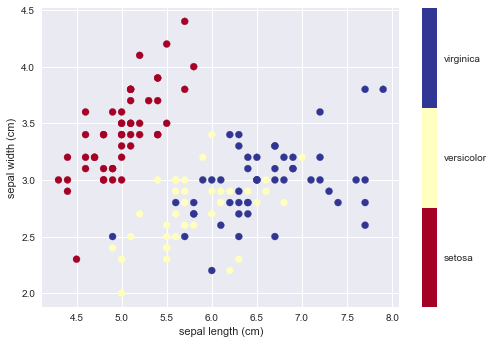

In [41]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

# Introducción a la API de Scikit-learn

## El objeto Estimator de Scikit-learn

Cada algoritmo se expone en scikit-learn a través de un objeto "Estimador". Por ejemplo, una regresión lineal se implementa así:

In [74]:
from sklearn.linear_model import LinearRegression

**Parámetros del estimador**: Todos los parámetros de un estimador se pueden configurar cuando se crea una instancia y tienen valores predeterminados adecuados:

In [78]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [15]:
print(model)

LinearRegression(normalize=True)


**Parámetros estimados del modelo**: cuando los datos se *ajustan* a un estimador, los parámetros se estiman a partir de los datos disponibles. Todos los parámetros estimados son atributos del objeto estimador que terminan con un guión bajo:

In [85]:
x = np.arange(10)
y = 2 * x + 1

In [86]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


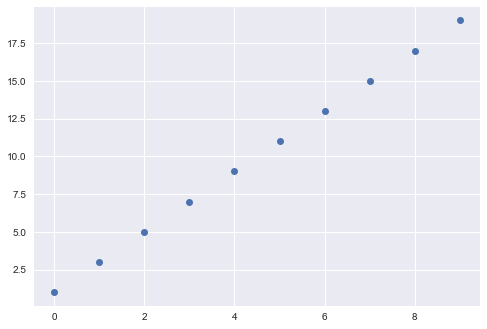

In [90]:
plt.plot(x, y,'o');

In [93]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [94]:
# fit the model on our data
model.fit(X, y)

LinearRegression(normalize=True)

In [95]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[2.]
1.0


# Aprendizaje supervisado: clasificación y regresión

En **Aprendizaje supervisado**, tenemos un conjunto de datos que consta de características y etiquetas.
La tarea consiste en construir un estimador que pueda predecir la etiqueta de un objeto, dado el conjunto de características. Un ejemplo relativamente simple es predecir la especie de
iris dado un conjunto de medidas de su flor. Ésta es una tarea relativamente sencilla.

Algunos ejemplos más complicados son:

- dada una imagen multicolor de un objeto a través de un telescopio, determine
  si ese objeto es una estrella, un quásar o una galaxia.
- dada una fotografía de una persona, identificar a la persona en la foto.
- dada una lista de películas que una persona ha visto y su calificación personal
  de la película, recomiende una lista de películas que les gustaría
  (Los llamados *sistemas de recomendación*)

Lo que estas tareas tienen en común es que hay una o más
cantidades asociadas con el objeto que deben determinarse a partir de otras
cantidades observadas.

El aprendizaje supervisado se divide en dos categorías, **clasificación** y **regresión**.

En la clasificación, la etiqueta es discreta, mientras que en la regresión, la etiqueta es continua. Por ejemplo,
En astronomía, la tarea de determinar si un objeto es una estrella, una galaxia o un cuásar es una
Problema de clasificación: la etiqueta pertenece a tres categorías distintas. Por otro lado, podríamos
desea estimar la edad de un objeto basado en tales observaciones: esto sería un problema de regresión,
porque la etiqueta (edad) es una cantidad continua.

## Pipelines de scikit-learn

In [96]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

In [100]:
# Load and split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [101]:
# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', svm.SVC(random_state=42))])

pipe_dt = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', tree.DecisionTreeClassifier(random_state=42))])

# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_dt]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree'}

In [102]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [104]:
# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Logistic Regression pipeline test accuracy: 0.900
Support Vector Machine pipeline test accuracy: 0.900
Decision Tree pipeline test accuracy: 0.867


In [105]:
# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

Classifier with best accuracy: Logistic Regression
